In [ ]:
import tensorflow as tf

In [ ]:
## How to create constants in Tensorflow

a = tf.constant(5)

b = tf.constant(6)

c = tf.add(a, b)
print(c)

tf.Tensor(11, shape=(), dtype=int32)


In [ ]:
## How to create variables in Tensorflow

var1 = tf.Variable(1)
var2 = tf.Variable(2)

print(tf.multiply(var1, var2))


tf.Tensor(2, shape=(), dtype=int32)


In [ ]:
## Import MNIST dataset

(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


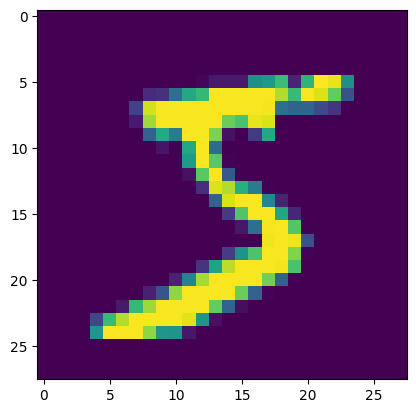

5


In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0])
plt.show()

print(Y_train[0])

In [ ]:
## Convert 2D features to 1D and output values to one hot encoded format

X_train = X_train.reshape(X_train.shape[0],-1)/255.0
X_test = X_test.reshape(X_test.shape[0],-1)/255.0

Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(784,))) ## first hidden layer
model.add(Dense(256, activation ='relu'))                     ## second hidden layer
model.add(Dense(10, activation='softmax'))                    ## output layer

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) ## adding optimizer, loss fn, metric

In [ ]:
model.fit(X_train, Y_train, epochs=10, batch_size=1024)

Epoch 1/10
59/59 [==============================] - 9s 95ms/step - loss: 0.5745 - accuracy: 0.8496
Epoch 2/10
59/59 [==============================] - 4s 65ms/step - loss: 0.1975 - accuracy: 0.9429
Epoch 3/10
59/59 [==============================] - 4s 64ms/step - loss: 0.1421 - accuracy: 0.9595
Epoch 4/10
59/59 [==============================] - 3s 47ms/step - loss: 0.1061 - accuracy: 0.9694
Epoch 5/10
59/59 [==============================] - 3s 53ms/step - loss: 0.0837 - accuracy: 0.9760
Epoch 6/10
59/59 [==============================] - 2s 32ms/step - loss: 0.0685 - accuracy: 0.9806
Epoch 7/10
59/59 [==============================] - 2s 34ms/step - loss: 0.0554 - accuracy: 0.9842
Epoch 8/10
59/59 [==============================] - 2s 34ms/step - loss: 0.0466 - accuracy: 0.9872
Epoch 9/10
59/59 [==============================] - 2s 33ms/step - loss: 0.0404 - accuracy: 0.9883
Epoch 10/10
59/59 [==============================] - 2s 37ms/step - loss: 0.0332 - accuracy: 0.9909


In [ ]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0760 - accuracy: 0.9759


[0.07598400861024857, 0.9758999943733215]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [ ]:
## Building model using functional API

from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Concatenate, Input

In [ ]:
input = Input(shape=[784,])

hidden_1 = Dense(256, activation='relu')(input)
hidden_2 = Dense(256, activation='relu')(hidden_1)
hidden_3 = Dense(256, activation='relu')(input)

concat = Concatenate()([hidden_2, hidden_3])

output = Dense(10, activation='softmax')(concat)

In [ ]:
model = Model(inputs = [input], outputs = [output])


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) ## adding optimizer, loss fn, metric

In [ ]:
model.fit(X_train, Y_train, epochs=10, batch_size=1024)

Epoch 1/10
59/59 [==============================] - 4s 52ms/step - loss: 0.5285 - accuracy: 0.8588
Epoch 2/10
59/59 [==============================] - 3s 54ms/step - loss: 0.1842 - accuracy: 0.9477
Epoch 3/10
59/59 [==============================] - 3s 51ms/step - loss: 0.1280 - accuracy: 0.9637
Epoch 4/10
59/59 [==============================] - 5s 77ms/step - loss: 0.0949 - accuracy: 0.9725
Epoch 5/10
59/59 [==============================] - 3s 56ms/step - loss: 0.0749 - accuracy: 0.9778
Epoch 6/10
59/59 [==============================] - 3s 57ms/step - loss: 0.0588 - accuracy: 0.9831
Epoch 7/10
59/59 [==============================] - 4s 60ms/step - loss: 0.0475 - accuracy: 0.9866
Epoch 8/10
59/59 [==============================] - 4s 67ms/step - loss: 0.0394 - accuracy: 0.9890
Epoch 9/10
59/59 [==============================] - 3s 53ms/step - loss: 0.0317 - accuracy: 0.9911
Epoch 10/10
59/59 [==============================] - 3s 53ms/step - loss: 0.0268 - accuracy: 0.9930


In [ ]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0693 - accuracy: 0.9789


[0.06929716467857361, 0.9789000153541565]

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 784)]        0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 256)          200960      ['input_1[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 256)          65792       ['dense_3[0][0]']                
                                                                                                  
 dense_5 (Dense)                (None, 256)          200960      ['input_1[0][0]']                
                                                                                              

In [ ]:
from tensorflow.python.ops.variables import initialize_variables
## Let's create custom layers

from tensorflow.keras import layers

class MLayer(layers.Layer):

  def __init__(self, units, input_dim, activation):
    super(MLayer, self).__init__()

    w_init = tf.keras.initializers.random_normal()
    self.w = tf.Variable(initial_value=w_init(shape = (input_dim, units), dtype= 'float32'), trainable=True)

    b_init = tf.keras.initializers.random_normal()
    self.b = tf.Variable(initial_value= b_init(shape = (units, ), dtype='float32'), trainable= True)

    self.activation = activation

  ## Function to do main computation
  def call(self, inputs):
    linear_op = tf.add(tf.matmul(inputs, self.w), self.b)

    if self.activation == 'relu':
      return tf.nn.relu(linear_op)
    elif self.activation == 'softmax':
      return tf.nn.softmax(linear_op)



In [ ]:
## let's create custom model

class MModel(tf.keras.Model):

  def __init__(self, n_input, n_hidden1, n_hidden2, n_classes):
    super(MModel, self).__init__()

    self.layer1 = MLayer(n_hidden1, n_input, 'relu')
    self.layer2 = MLayer(n_hidden2, n_hidden1, 'relu')
    self.out_layer = MLayer(n_classes, n_hidden2, 'softmax')

  ## Function to do main computation
  def call(self, inputs):
    x = self.layer1(inputs)
    y = self.layer2(x)

    return self.out_layer(y)



In [ ]:
model = MModel(784, 256, 256, 10)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, epochs=20, batch_size=1024)

Epoch 1/20
59/59 [==============================] - 3s 34ms/step - loss: 0.6767 - accuracy: 0.8280
Epoch 2/20
59/59 [==============================] - 2s 39ms/step - loss: 0.2402 - accuracy: 0.9311
Epoch 3/20
59/59 [==============================] - 3s 52ms/step - loss: 0.1740 - accuracy: 0.9498
Epoch 4/20
59/59 [==============================] - 2s 35ms/step - loss: 0.1328 - accuracy: 0.9621
Epoch 5/20
59/59 [==============================] - 2s 32ms/step - loss: 0.1067 - accuracy: 0.9694
Epoch 6/20
59/59 [==============================] - 2s 32ms/step - loss: 0.0869 - accuracy: 0.9749
Epoch 7/20
59/59 [==============================] - 2s 32ms/step - loss: 0.0719 - accuracy: 0.9797
Epoch 8/20
59/59 [==============================] - 2s 36ms/step - loss: 0.0609 - accuracy: 0.9832
Epoch 9/20
59/59 [==============================] - 3s 54ms/step - loss: 0.0520 - accuracy: 0.9854
Epoch 10/20
59/59 [==============================] - 2s 33ms/step - loss: 0.0452 - accuracy: 0.9869
Epoch 11/

In [ ]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0742 - accuracy: 0.9774


[0.07419414073228836, 0.977400004863739]

In [ ]:
model.summary()

Model: "m_model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 m_layer (MLayer)            multiple                  200960    
                                                                 
 m_layer_1 (MLayer)          multiple                  65792     
                                                                 
 m_layer_2 (MLayer)          multiple                  2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________
